<a href="https://colab.research.google.com/github/Mya-Miller/MachineLearningProject/blob/main/Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [2]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
from tensorflow import keras

#Loading and Splitting

In [4]:
train_data_path = 'emnist-letters-train.csv'
test_data_path = 'emnist-letters-test.csv'

In [5]:
X_train = pd.read_csv(train_data_path, header=None)
X_test = pd.read_csv(test_data_path, header=None)

#Data exploration

In [6]:
X_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_train.shape

(88800, 785)

Data is flipped

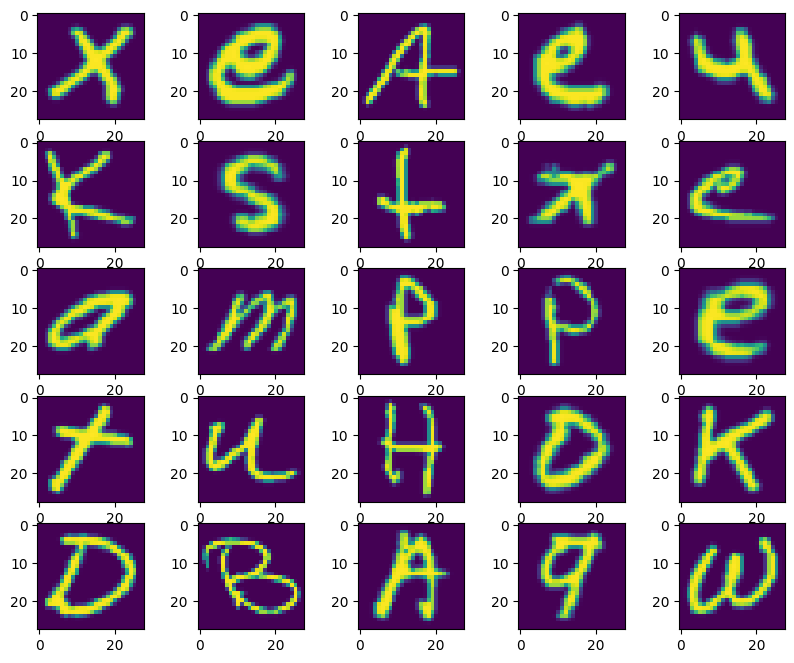

In [8]:
# Image pixel size = 28
img_size = 28
# Get the numpy array of columns starting from column 1
x1 = np.array(X_train.iloc[:,1:].values)
indices = np.arange(len(x1))
# Pick a random data rows
np.random.shuffle(indices)
# Generate a sub-plot grid 5x5
fig,axes = plt.subplots(5,5,figsize=(10,8))
# Flip, flatten and rotate image to display
for i,ax in enumerate(axes.flat):
    img = x1[indices[i]].reshape([img_size, img_size])
    image = np.fliplr(img)
    image = np.rot90(image)
    ax.imshow(image)

Number of classes - alphabets

In [9]:
num_classes = len(X_train[0].unique())
num_classes

26

In [10]:
test_num_classes = len(X_test[0].unique())
test_num_classes

19

Show image function

In [11]:
# The classes of this balanced dataset are as follows. Index into it based on class label
class_mapping = ' ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [12]:
def show_img(data, row_num):
    img_flip = np.transpose(data.values[row_num,1:].reshape(img_size, img_size), axes=[1,0]) # img_size * img_size arrays
    plt.title('Class: ' + str(data.values[row_num,0]) + ', Label: ' + str(class_mapping[data.values[row_num,0]]))
    plt.imshow(img_flip, cmap='Greys_r')

#SVM Pre-Processing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [14]:
X = X_train.drop([0], axis=1)
y = X_train.values[:,0]

In [15]:
X_tst = X_test.drop([0], axis=1)
y_tst = X_test.values[:,0]

In [16]:
# Flatten the images
X = X / 255.0  # Normalize pixel values to be in the range [0, 1]
X = X.values.reshape(X.shape[0], 28*28)
X_tst = X_tst / 255.0  # Normalize pixel values for the test set
X_tst = X_tst.values.reshape(X_tst.shape[0], 28*28)

#Pre-Processing

In [19]:
data_rows = len(X_train)
if not num_classes:
    num_classes = len(X_train[0].unique())

In [20]:
test_data_rows = len(X_test)
if not test_num_classes:
    test_num_classes = len(X_test[0].unique())

Cleaning image size

In [21]:
img_size = int(np.sqrt(len(X_train.iloc[0][1:])))

Invert the images using transpose

In [22]:
imgs = np.transpose(X_train.values[:,1:].reshape(data_rows, img_size, img_size, 1), axes=[0,2,1,3])

In [23]:
test_imgs = np.transpose(X_test.values[:,1:].reshape(test_data_rows, img_size, img_size, 1), axes=[0,2,1,3])

Clean the label column from any variable

In [24]:
labels = keras.utils.to_categorical(X_train.values[:,0])
test_labes = keras.utils.to_categorical(X_test.values[:,0])

Flatten image pixels

In [25]:
X_train = imgs/255
X_test_flatttened = test_imgs/255

In [26]:
X_train.shape

(85189, 28, 28, 1)

In [27]:
y_train = labels

In [28]:
y_train.shape

(85189, 27)

In [29]:
y_test = test_labes

In [30]:
X_test_flatttened.shape

(14800, 28, 28, 1)

In [31]:
y_test.shape

(14800, 20)

#SVM

In [17]:
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

SVC(kernel='linear')

In [18]:
y_pred_test = svm_model.predict(X_tst)
accuracy_val = accuracy_score(y_tst, y_pred_test)
print(f'Validation Accuracy: {accuracy_val}')

Validation Accuracy: 0.7710810810810811


In [20]:
pip install joblib

In [21]:
import joblib

# Save the model
joblib.dump(svm_model, 'svm_model_linear.pkl')

# Load the model
loaded_svm_model = joblib.load('svm_model_linear.pkl')

#CNN - CONV-2D Model

Model Tunning

In [33]:
model = keras.models.Sequential()

# model.add(keras.layers.Reshape((img_size,img_size,1), input_shape=(784,)))
model.add(keras.layers.Conv2D(filters=12, kernel_size=(5,5), strides=2, activation='relu',
                              input_shape=(img_size,img_size,1)))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=18, kernel_size=(3,3) , strides=2, activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=24, kernel_size=(2,2), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=150, activation='relu'))
model.add(keras.layers.Dense(units=len(class_mapping), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 12, 12)        312       
                                                                 
 dropout (Dropout)           (None, 12, 12, 12)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 18)          1962      
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 18)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 24)          1752      
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 150)               5

In [34]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 12, 12, 12]
[None, 12, 12, 12]
[None, 5, 5, 18]
[None, 5, 5, 18]
[None, 4, 4, 24]
[None, 384]
[None, 150]
[None, 27]


Data augmentation (ImageDataGenerator)

In [35]:
data_generator = keras.preprocessing.image.ImageDataGenerator(validation_split=.2)
training_data_generator = data_generator.flow(X_train, y_train, subset='training')
validation_data_generator = data_generator.flow(X_train, y_train, subset='validation')

DataGenerator variety

In [155]:
data_generator_with_aug = keras.preprocessing.image.ImageDataGenerator(validation_split=.2,
                                            width_shift_range=.2, height_shift_range=.2,
                                            rotation_range=60, zoom_range=.2, shear_range=.3)

Training (epochs - 5)

In [36]:
history = model.fit_generator(training_data_generator,
                              steps_per_epoch=500, epochs=5,
                              validation_data=validation_data_generator)

Epoch 1/5


<ipython-input-36-9a81903cf9ee>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_data_generator,


500/500 [==============================] - 12s 21ms/step - loss: 1.8932 - accuracy: 0.4363 - val_loss: 1.0366 - val_accuracy: 0.6891
Epoch 2/5
500/500 [==============================] - 11s 22ms/step - loss: 1.0719 - accuracy: 0.6704 - val_loss: 0.7084 - val_accuracy: 0.7713
Epoch 3/5
500/500 [==============================] - 9s 19ms/step - loss: 0.8463 - accuracy: 0.7324 - val_loss: 0.5580 - val_accuracy: 0.8224
Epoch 4/5
500/500 [==============================] - 12s 24ms/step - loss: 0.7319 - accuracy: 0.7681 - val_loss: 0.5105 - val_accuracy: 0.8362
Epoch 5/5
500/500 [==============================] - 11s 22ms/step - loss: 0.6609 - accuracy: 0.7890 - val_loss: 0.4604 - val_accuracy: 0.8492


#CNN - LeNet-5 Model

In [ ]:
from tensorflow import keras

model_letnet5 = keras.models.Sequential()

# Convolutional Layer 1
model_letnet5.add(keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(img_size, img_size, 1)))

# Activation Function (ReLU) for Conv1
model_letnet5.add(keras.layers.Activation('relu'))

# Pooling Layer 1
model_letnet5.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model_letnet5.add(keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

# Activation Function (ReLU) for Conv2
model_letnet5.add(keras.layers.Activation('relu'))

# Pooling Layer 2
model_letnet5.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model_letnet5.add(keras.layers.Flatten())

# Fully Connected Layer 1 (FC1)
model_letnet5.add(keras.layers.Dense(units=120, activation='relu'))

# Fully Connected Layer 2 (FC2)
model_letnet5.add(keras.layers.Dense(units=84, activation='relu'))

# Output Layer (FC3)
model_letnet5.add(keras.layers.Dense(units=len(class_mapping), activation='softmax'))

# Compile the model
model_letnet5.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_letnet5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 activation (Activation)     (None, 24, 24, 6)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 activation_1 (Activation)   (None, 8, 8, 16)          0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                 

In [ ]:
for layer in model_letnet5.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 24, 24, 6]
[None, 24, 24, 6]
[None, 12, 12, 6]
[None, 8, 8, 16]
[None, 8, 8, 16]
[None, 4, 4, 16]
[None, 256]
[None, 120]
[None, 84]
[None, 27]


Data augmentation (ImageDataGenerator)

In [ ]:
data_generator_with_aug = keras.preprocessing.image.ImageDataGenerator(validation_split=.2,
                                            width_shift_range=.2, height_shift_range=.2,
                                            rotation_range=60, zoom_range=.2, shear_range=.3)
training_data_generator_lenet = data_generator_with_aug.flow(X_train, y_train, subset='training')
validation_data_generator_lenet = data_generator_with_aug.flow(X_train, y_train, subset='validation')

In [ ]:
history = model.fit_generator(training_data_generator_lenet,
                              steps_per_epoch=500, epochs=5,
                              validation_data=validation_data_generator)

Epoch 1/5


<ipython-input-33-2163e0d9f0a2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_data_generator_lenet,


500/500 [==============================] - 18s 36ms/step - loss: 2.8353 - accuracy: 0.1986 - val_loss: 1.2875 - val_accuracy: 0.7297
Epoch 2/5
500/500 [==============================] - 18s 36ms/step - loss: 2.5916 - accuracy: 0.2542 - val_loss: 1.2117 - val_accuracy: 0.7133
Epoch 3/5
500/500 [==============================] - 16s 32ms/step - loss: 2.4595 - accuracy: 0.2830 - val_loss: 1.1957 - val_accuracy: 0.6971
Epoch 4/5
500/500 [==============================] - 18s 37ms/step - loss: 2.3378 - accuracy: 0.3171 - val_loss: 1.1661 - val_accuracy: 0.6945
Epoch 5/5
500/500 [==============================] - 15s 30ms/step - loss: 2.2393 - accuracy: 0.3447 - val_loss: 1.0770 - val_accuracy: 0.7017


# CNN - VGGNet

In [157]:
from tensorflow import keras

# Create a VGG-like model
model_VGGNet = keras.models.Sequential()

# Block 1
model_VGGNet.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model_VGGNet.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_VGGNet.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model_VGGNet.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGGNet.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_VGGNet.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model_VGGNet.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGGNet.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGGNet.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_VGGNet.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten and dense layers
model_VGGNet.add(keras.layers.Flatten())
model_VGGNet.add(keras.layers.Dense(4096, activation='relu'))
model_VGGNet.add(keras.layers.Dense(4096, activation='relu'))
model_VGGNet.add(keras.layers.Dense(len(class_mapping), activation='softmax'))  # Adjust the output size based on your classes

# Compile the model
model_VGGNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_VGGNet.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                 

In [ ]:
for layer in model_VGGNet.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 28, 28, 64]
[None, 28, 28, 64]
[None, 14, 14, 64]
[None, 14, 14, 128]
[None, 14, 14, 128]
[None, 7, 7, 128]
[None, 7, 7, 256]
[None, 7, 7, 256]
[None, 7, 7, 256]
[None, 3, 3, 256]
[None, 2304]
[None, 4096]
[None, 4096]
[None, 27]


In [ ]:
history_VGGNet = model_VGGNet.fit(training_data_generator, epochs=5, validation_data=validation_data_generator)

Epoch 1/5
2220/2220 [==============================] - 3066s 1s/step - loss: 3.2604 - accuracy: 0.0386 - val_loss: 3.2601 - val_accuracy: 0.0396
Epoch 2/5
2220/2220 [==============================] - 3056s 1s/step - loss: 3.2591 - accuracy: 0.0390 - val_loss: 3.2586 - val_accuracy: 0.0385
Epoch 3/5
2220/2220 [==============================] - 3040s 1s/step - loss: 3.2587 - accuracy: 0.0379 - val_loss: 3.2588 - val_accuracy: 0.0385
Epoch 4/5
2220/2220 [==============================] - 3063s 1s/step - loss: 3.2586 - accuracy: 0.0375 - val_loss: 3.2586 - val_accuracy: 0.0372
Epoch 5/5
2220/2220 [==============================] - 3060s 1s/step - loss: 3.2586 - accuracy: 0.0372 - val_loss: 3.2585 - val_accuracy: 0.0372


#Custom CNN

In [158]:
from tensorflow import keras
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

# Number of classes for letter classification
num_classes = len(class_mapping)

# Create a CNN model for letter classification
letter_model = keras.models.Sequential()

# 1st Convolutional Layer
letter_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
letter_model.add(BatchNormalization())
letter_model.add(Activation('relu'))
letter_model.add(MaxPooling2D(pool_size=(2, 2)))
letter_model.add(Dropout(0.25))

# 2nd Convolutional Layer
letter_model.add(Conv2D(128, (5, 5), padding='same'))
letter_model.add(BatchNormalization())
letter_model.add(Activation('relu'))
letter_model.add(MaxPooling2D(pool_size=(2, 2)))
letter_model.add(Dropout(0.25))

# 3rd Convolutional Layer
letter_model.add(Conv2D(256, (3, 3), padding='same'))
letter_model.add(BatchNormalization())
letter_model.add(Activation('relu'))
letter_model.add(MaxPooling2D(pool_size=(2, 2)))
letter_model.add(Dropout(0.25))

# Flatten layer
letter_model.add(Flatten())

# Fully connected layer 1
letter_model.add(Dense(256))
letter_model.add(BatchNormalization())
letter_model.add(Activation('relu'))
letter_model.add(Dropout(0.25))

# Fully connected layer 2
letter_model.add(Dense(512))
letter_model.add(BatchNormalization())
letter_model.add(Activation('relu'))
letter_model.add(Dropout(0.25))

# Output layer
letter_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.0001)
letter_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
letter_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 activation_5 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)      

In [ ]:
history_mdl2 = letter_model.fit(training_data_generator, epochs=5, validation_data=validation_data_generator)

Epoch 1/5
2220/2220 [==============================] - 713s 320ms/step - loss: 1.2305 - accuracy: 0.6333 - val_loss: 0.4828 - val_accuracy: 0.8470
Epoch 2/5
2220/2220 [==============================] - 710s 320ms/step - loss: 0.4940 - accuracy: 0.8408 - val_loss: 0.2855 - val_accuracy: 0.9033
Epoch 3/5
2220/2220 [==============================] - 711s 320ms/step - loss: 0.3733 - accuracy: 0.8785 - val_loss: 0.2255 - val_accuracy: 0.9212
Epoch 4/5
2220/2220 [==============================] - 709s 319ms/step - loss: 0.3125 - accuracy: 0.8971 - val_loss: 0.2113 - val_accuracy: 0.9269
Epoch 5/5
2220/2220 [==============================] - 710s 320ms/step - loss: 0.2766 - accuracy: 0.9077 - val_loss: 0.1784 - val_accuracy: 0.9368


#Prediction

Prediction function

In [9]:
def run_prediction(idx, model):
    result = np.argmax(model.predict(X_test_flatttened[idx:idx+1]))
    print('Prediction: ', result, ', Char: ', class_mapping[result])
    print('Label: ', X_test.values[idx,0])
    show_img(X_test, idx)

Predict random data rows from test_data

1/1 [==============================] - 0s 416ms/step
Prediction:  2 , Char:  B
Label:  2
1/1 [==============================] - 0s 35ms/step
Prediction:  8 , Char:  H
Label:  8
1/1 [==============================] - 0s 24ms/step
Prediction:  9 , Char:  I
Label:  9
1/1 [==============================] - 0s 29ms/step
Prediction:  1 , Char:  A
Label:  1
1/1 [==============================] - 0s 27ms/step
Prediction:  12 , Char:  L
Label:  9
1/1 [==============================] - 0s 26ms/step
Prediction:  9 , Char:  I
Label:  9
1/1 [==============================] - 0s 24ms/step
Prediction:  2 , Char:  B
Label:  2
1/1 [==============================] - 0s 25ms/step
Prediction:  9 , Char:  I
Label:  9
1/1 [==============================] - 0s 28ms/step
Prediction:  9 , Char:  I
Label:  9
1/1 [==============================] - 0s 24ms/step
Prediction:  3 , Char:  C
Label:  3
1/1 [==============================] - 0s 26ms/step
Prediction:  14 , Char:  N
Label:  2
1/1 [========================

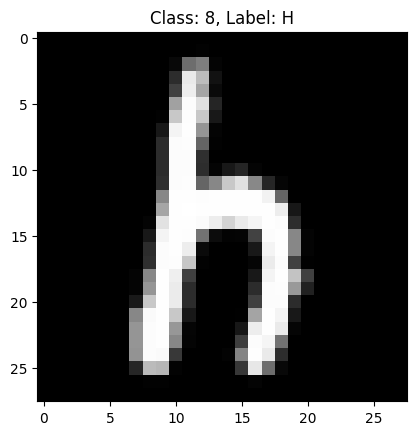

In [32]:
for _ in range(1,15):
    idx = random.randint(0, 8000)
    run_prediction(idx, loaded_custom_CNN)

Check prediction of a single character

1

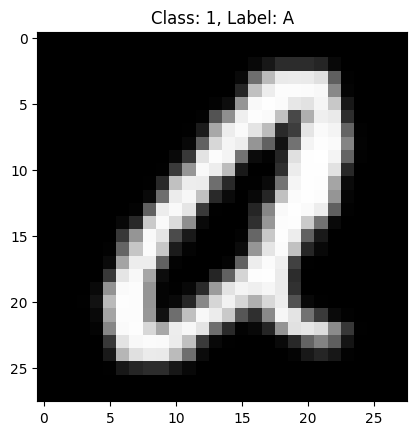

In [ ]:
show_img(X_test, 144)
np.argmax(y_test[144])

463/463 [==============================] - 38s 82ms/step


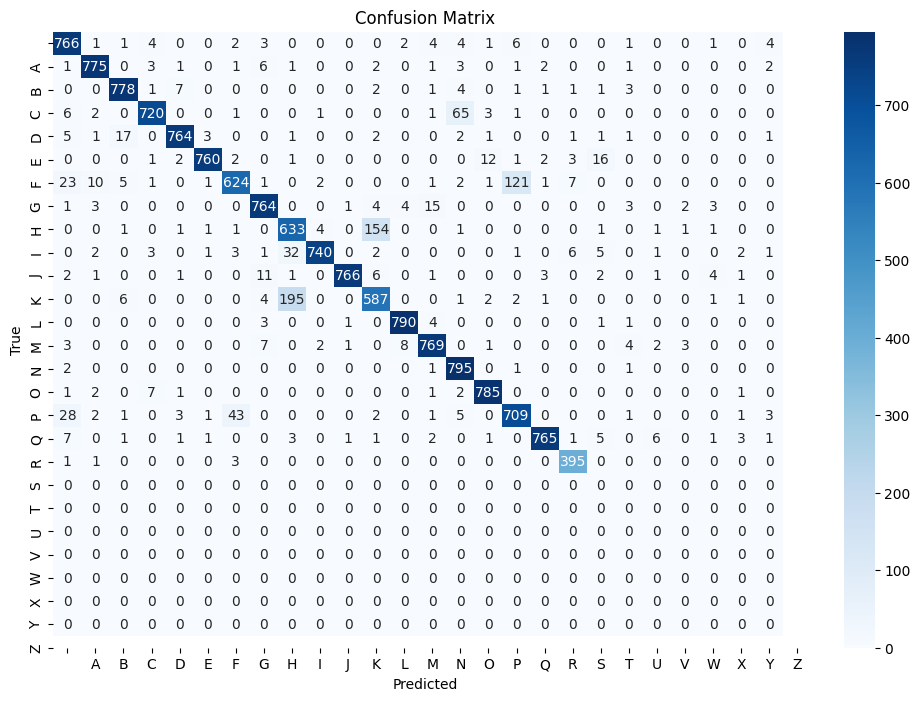

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Get predictions from the model
y_pred_prob = letter_model.predict(X_test_flatttened)
y_pred = np.argmax(y_pred_prob, axis=1)

# Plot confusion matrix
plot_confusion_matrix(np.argmax(y_test, axis=1), y_pred, class_mapping)


463/463 [==============================] - 3s 5ms/step


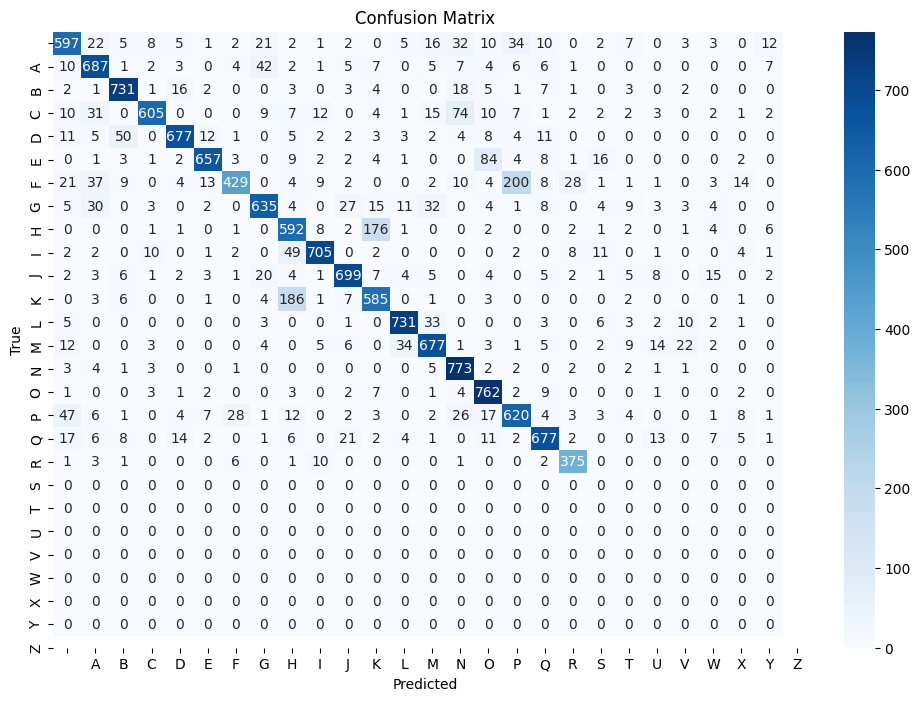

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Get predictions from the model
y_pred_prob = model.predict(X_test_flatttened)
y_pred = np.argmax(y_pred_prob, axis=1)

# Plot confusion matrix
plot_confusion_matrix(np.argmax(y_test, axis=1), y_pred, class_mapping)


# Accuracy and Loss function

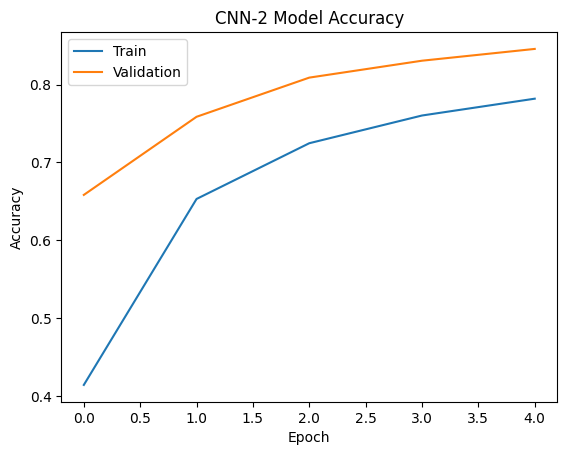

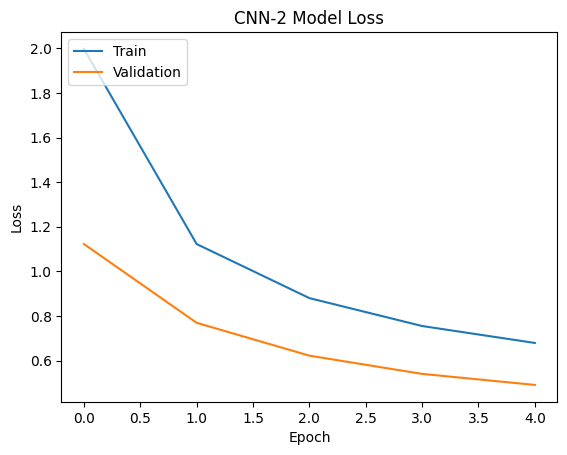

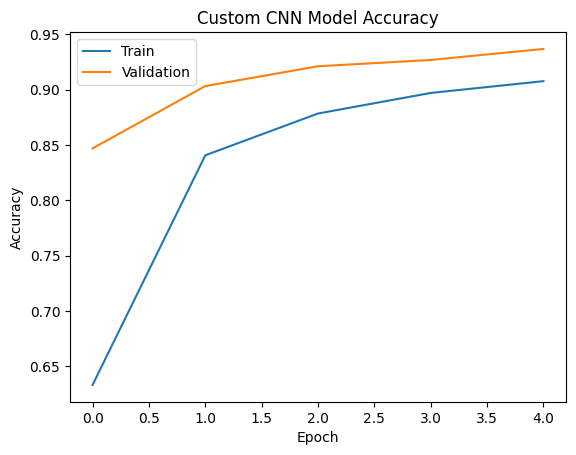

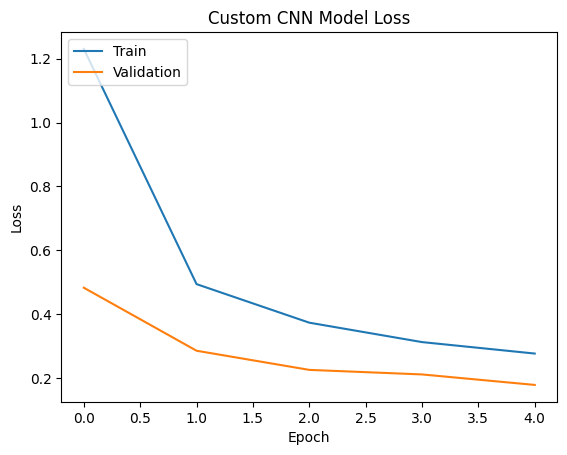

In [ ]:
import matplotlib.pyplot as plt

# Function to plot loss and accuracy curves
def plot_curves(history, model_name):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(model_name + ' Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(model_name + ' Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot curves for the CNN-2 model
plot_curves(history, 'CNN-2')

# Plot curves for the VGGNet model
#plot_curves(history_VGGNet, 'VGGNet')

# Plot curves for the custom CNN model
plot_curves(history_mdl2, 'Custom CNN')

1/1 [==============================] - 0s 20ms/step
Prediction: M, True Label: M
1/1 [==============================] - 0s 21ms/step
Prediction: E, True Label: E
1/1 [==============================] - 0s 23ms/step
Prediction: O, True Label: O
1/1 [==============================] - 0s 21ms/step
Prediction: O, True Label: O
1/1 [==============================] - 0s 28ms/step
Prediction: F, True Label: F


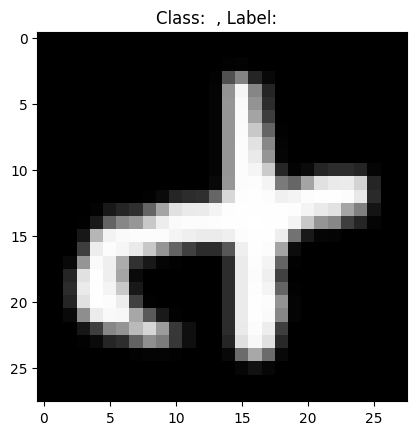

In [ ]:
# Function to visualize predictions
def visualize_predictions(letter_model, X_test, class_mapping):
    for _ in range(5):
        idx = np.random.randint(0, len(X_test))
        prediction = np.argmax(model.predict(X_test[idx:idx+1]))
        true_label = np.argmax(y_test[idx])

        print(f'Prediction: {class_mapping[prediction]}, True Label: {class_mapping[true_label]}')
        show_img(X_test, idx, class_mapping)

# Updated show_img function
def show_img(data, row_num, class_mapping):
    img_flip = np.transpose(data[row_num].reshape(img_size, img_size), axes=[1, 0])  # img_size * img_size arrays
    class_index = int(data[row_num, 0][0]) if isinstance(data[row_num, 0], np.ndarray) else int(data[row_num, 0])
    plt.title('Class: ' + str(class_mapping[class_index]) + ', Label: ' + str(class_mapping[class_index]))
    plt.imshow(img_flip, cmap='Greys_r')

# Visualize predictions
visualize_predictions(model, X_test_flatttened, class_mapping)

#Export model (Save model)

In [ ]:
letter_model.save('letter_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Import model and check

In [2]:
from tensorflow.keras.models import load_model

loaded_custom_CNN = load_model('letter_classification_model.h5')

In [ ]:
for _ in range(1,15):
    idx = random.randint(0, 8000)
    run_prediction(idx)